In [2]:
from hmf import MassFunction,cosmology     # The main hmf class
import matplotlib.pyplot as plt  # The necessary plotting library
import numpy as np               # Numerical array library
import os
# This just serves to render plots inline in the notebook. Do not use in a script.
%matplotlib inline

In [3]:
from hmf import Transfer, transfer, transfer_models

In [4]:
from scipy import integrate

In [5]:
from hmf.mass_function import *

In [6]:
import matplotlib
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['axes.labelsize'] = 20

In [1]:
from itertools import cycle
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

In [5]:
MassFunction.get_all_parameter_defaults(recursive=False)

{'cosmo_model': FlatLambdaCDM(name='Planck18', H0=<Quantity 67.66 km / (Mpc s)>, Om0=0.30966, Tcmb0=<Quantity 2.7255 K>, Neff=3.046, m_nu=<Quantity [0.  , 0.  , 0.06] eV>, Ob0=0.04897),
 'cosmo_params': {},
 'n': 0.96670000000000000373,
 'sigma_8': 0.8158999999999999586,
 'growth_params': {},
 'lnk_min': -18.420680743952367209,
 'lnk_max': 9.903487552536127225,
 'dlnk': 0.050000000000000002776,
 'z': 0.0,
 'transfer_model': hmf.density_field.transfer_models.CAMB,
 'transfer_params': {},
 'takahashi': True,
 'growth_model': hmf.cosmology.growth_factor.GrowthFactor,
 'hmf_model': hmf.mass_function.fitting_functions.Tinker08,
 'Mmin': 10.0,
 'Mmax': 15.0,
 'dlog10m': 0.010000000000000000208,
 'mdef_model': None,
 'mdef_params': {},
 'delta_c': 1.6859999999999999432,
 'hmf_params': {},
 'filter_model': hmf.density_field.filters.TopHat,
 'filter_params': {},
 'disable_mass_conversion': True}

In [10]:
from astropy import units as u

In [32]:
def cal_integ_mass(mft):
    ttm = integrate.cumulative_simpson(mft.dndm*mft.m*mft.m, x=np.log(mft.m))
    # xx=(mft.m[:-1]+mft.m[1:])/2
    dtm = ttm[1:] - ttm[:-1]
    ttm = np.cumsum(dtm[::-1])[::-1]
    xxx = mft.m[1:-1]  #(mft.m[:-1]+mft.m[1:])/2
    return xxx, ttm, xxx, dtm/mft.dlog10m

In [8]:
import astropy.units as u
def cal_mean_dens(cosmo):
    """
    Mean density of universe at z=0, [Msun h^2 / Mpc**3]
    """
    return  (cosmo.Om0 * cosmo.critical_density0 / cosmo.h ** 2).to(u.Msun / u.Mpc ** 3).value


In [23]:
# Compare mean densities
mf = MassFunction(Mmin=-8,Mmax=17,z=0,hmf_model="SMT")
print(mf.cosmo.critical_density0.to((u.solMass)/(u.Mpc)**3)/mf.cosmo.h**2*mf.cosmo.Om0, cal_mean_dens(mf.cosmo),mf.mean_density0)

85941991992.94392 solMass / Mpc3 85941991992.94392 85941991992.94392395


# Check the effect of integration range

In [ ]:
# mfd=MassFunction(Mmin=-30,Mmax=36,z=0,lnk_min=-30, lnk_max=100,hmf_model="PS")
# xid,mid,xfd,mdd=cal_integ_mass(mfd)

# mf1=MassFunction(Mmin=-30,Mmax=17,z=0,lnk_min=-30, lnk_max=100,hmf_model="PS")
# xi1,mi1,xf1,md1=cal_integ_mass(mf1)

# mf2=MassFunction(Mmin=-30,Mmax=25,z=0,lnk_min=-30, lnk_max=100,hmf_model="PS")
# xi2,mi2,xf2,md2=cal_integ_mass(mf2)

mf3=MassFunction(Mmin=-8,Mmax=36,z=0,lnk_min=-30, lnk_max=100,hmf_model="PS")
xi3,mi3,xf3,md3=cal_integ_mass(mf3)

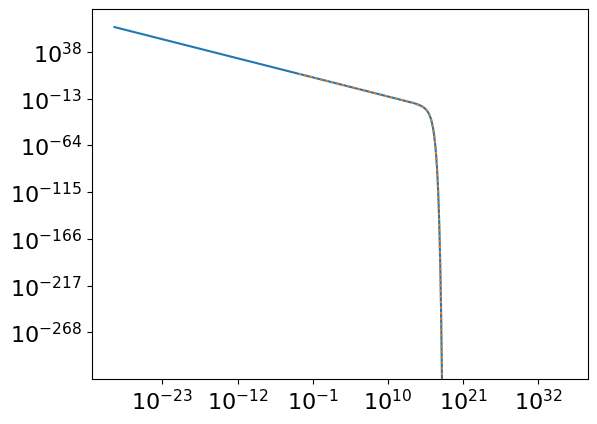

In [63]:
plt.loglog(mfd.m,mfd.dndm,'-')
plt.loglog(mf3.m,mf3.dndm,':')

/tmp/ipykernel_249522/1775202653.py:16: RuntimeWarning: invalid value encountered in divide
  ax2.plot(xid[ids],inp_mf[ids]/mid[ids],'--', label="-30 -- 17: cumulative")
/tmp/ipykernel_249522/1775202653.py:19: RuntimeWarning: invalid value encountered in divide
  ax3.plot(xfd[ids],inp_mf[ids]/mdd[ids],'--',label='-30 -- 17: differential')
/tmp/ipykernel_249522/1775202653.py:27: RuntimeWarning: invalid value encountered in divide
  ax2.plot(xid[ids],inp_mf[ids]/mid[ids],'--', label="-30 -- 25: cumulative")
/tmp/ipykernel_249522/1775202653.py:30: RuntimeWarning: invalid value encountered in divide
  ax3.plot(xfd[ids],inp_mf[ids]/mdd[ids],'--',label='-30 -- 25: differential')
/tmp/ipykernel_249522/1775202653.py:38: RuntimeWarning: invalid value encountered in divide
  ax2.plot(xid[ids],inp_mf[ids]/mid[ids],'--', label="-3 -- 36: cumulative")
/tmp/ipykernel_249522/1775202653.py:41: RuntimeWarning: invalid value encountered in divide
  ax3.plot(xfd[ids],inp_mf[ids]/mdd[ids],'--',label='-3 -

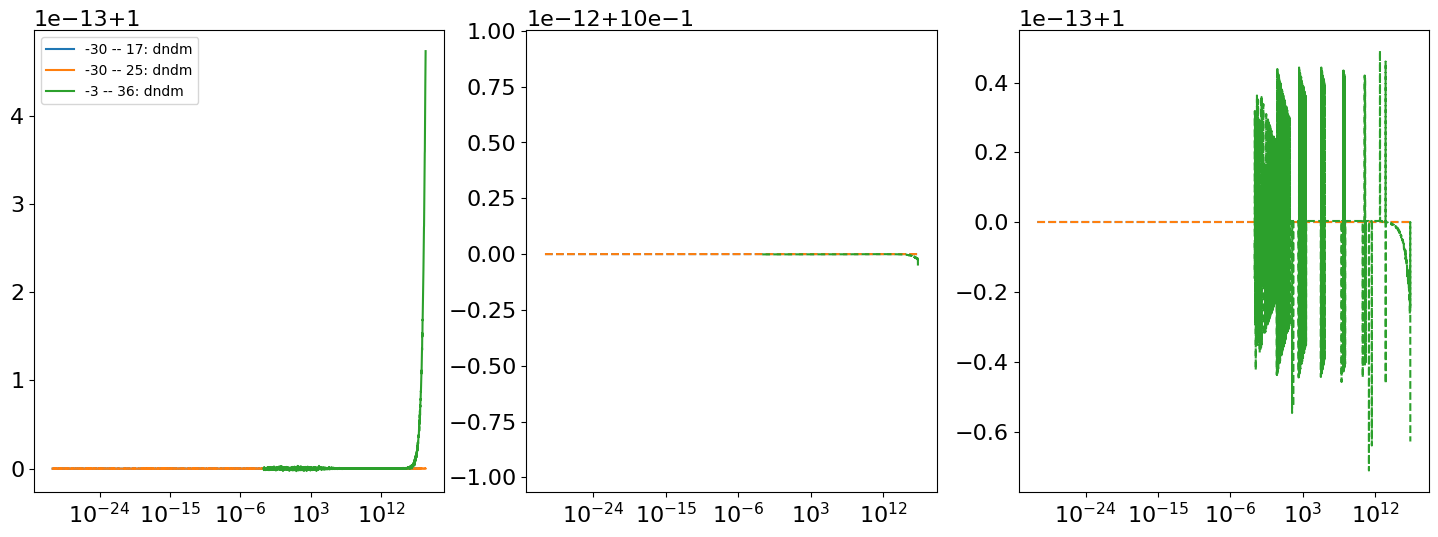

In [64]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
# msf=MassFunction(Mmin=1,Mmax=17,z=0,hmf_model="SMT")
# xi,mt,xf,mf=cal_integ_mass(msf,minm=-8,maxm=17)

# plt.loglog(msf.m,msf.dndm, '-', label='1-16: hmf')
# plt.loglog(xi,mt,'--', label="1-16: cumulative")
# plt.loglog(xf,mf,':',label='1-16: differential')
# plt.plot([0.1,1e16],[msf.mean_density0,msf.mean_density0],':')
# plt.xscale('log')

inp_mf=np.interp(np.float64(mfd.m),np.float64(mf1.m),np.float64(mf1.dndm), left=0,right=0)
ids=(mfd.m<=mf1.m.max()) & (mfd.dndm>1e-216)
ax1.plot(mfd.m[ids],inp_mf[ids]/mfd.dndm[ids], '-', label='-30 -- 17: dndm')
inp_mf=np.interp(np.float64(xid),np.float64(xi1),np.float64(mi1), left=0,right=0)
ids=xid<=xi1.max()
ax2.plot(xid[ids],inp_mf[ids]/mid[ids],'--', label="-30 -- 17: cumulative")
inp_mf=np.interp(np.float64(xfd),np.float64(xf1),np.float64(md1), left=0,right=0)
ids=xfd<=xf1.max()
ax3.plot(xfd[ids],inp_mf[ids]/mdd[ids],'--',label='-30 -- 17: differential')


inp_mf=np.interp(np.float64(mfd.m),np.float64(mf2.m),np.float64(mf2.dndm), left=0,right=0)
ids=(mfd.m<=mf2.m.max()) & (mfd.dndm>1e-216)
ax1.plot(mfd.m[ids],inp_mf[ids]/mfd.dndm[ids], '-', label='-30 -- 25: dndm')
inp_mf=np.interp(np.float64(xid),np.float64(xi2),np.float64(mi2), left=0,right=0)
ids=xid<=xi2.max()
ax2.plot(xid[ids],inp_mf[ids]/mid[ids],'--', label="-30 -- 25: cumulative")
inp_mf=np.interp(np.float64(xfd),np.float64(xf2),np.float64(md2), left=0,right=0)
ids=xfd<=xf2.max()
ax3.plot(xfd[ids],inp_mf[ids]/mdd[ids],'--',label='-30 -- 25: differential')


inp_mf=np.interp(np.float64(mfd.m),np.float64(mf3.m),np.float64(mf3.dndm), left=0,right=0)
ids=(mfd.m>=mf3.m.min()) & (mfd.m<mf3.m.max()) & (mfd.dndm>1e-216)
ax1.plot(mfd.m[ids],inp_mf[ids]/mfd.dndm[ids], '-', label='-3 -- 36: dndm')
inp_mf=np.interp(np.float64(xid),np.float64(xi3),np.float64(mi3), left=0,right=0)
ids=xid>=xi3.min()
ax2.plot(xid[ids],inp_mf[ids]/mid[ids],'--', label="-3 -- 36: cumulative")
inp_mf=np.interp(np.float64(xfd),np.float64(xf3),np.float64(md3), left=0,right=0)
ids=xfd>=xf3.min()
ax3.plot(xfd[ids],inp_mf[ids]/mdd[ids],'--',label='-3 -- 36: differential')

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax1.legend()
# plt.grid()
# plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
# plt.ylabel(r"Total mass in halos");

In [49]:
mfd.dndm,mf1.dndm,mf3.dndm,

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float128),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.49719695e-54, 3.93561356e-55, 1.00870894e-55], dtype=float128),
 array([6.83878340e+12, 6.63172681e+12, 6.43093489e+12, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00], dtype=float128))

In [28]:
xi2,mi2,xf2,md2

(array([1.02329299e-30, 1.04712855e-30, 1.07151931e-30, ...,
        9.12010839e+24, 9.33254301e+24, 9.54992586e+24], dtype=float128),
 array([7.29001952e+10, 7.29001952e+10, 7.29001952e+10, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([1.02329299e-30, 1.04712855e-30, 1.07151931e-30, ...,
        9.12010839e+24, 9.33254301e+24, 9.54992586e+24], dtype=float128),
 array([0., 0., 0., ..., 0., 0., 0.]))

Text(0, 0.5, 'Total mass in halos')

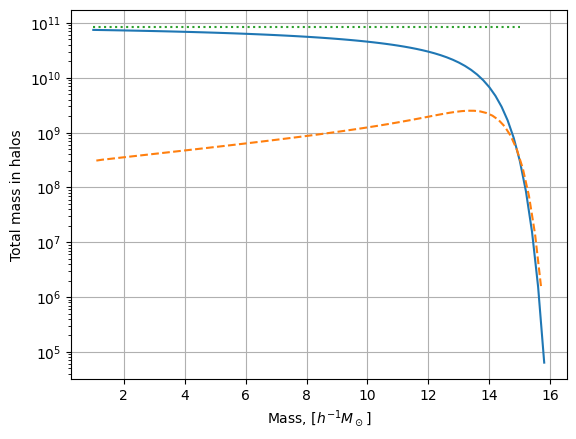

In [54]:
logm=np.arange(1,16,0.2)
ttm=np.copy(logm)
for i in range(logm.size):
    mft=MassFunction(Mmin=logm[i],Mmax=35,z=0,hmf_model='Tinker10')
    ttm[i]=integrate.simpson(mft.dndm*mft.m,mft.m) 

plt.plot(logm,ttm,'-', label="cumulative")
plt.plot((logm[1:]+logm[:-1])/2,ttm[:-1]-ttm[1:],'--',label='differential')
plt.plot([1,15],[mf.mean_density0,mf.mean_density0],':')
# plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
plt.ylabel(r"Total mass in halos")

In [ ]:
logm=np.arange(1,17,0.1)
ttm=np.copy(logm)
for i in range(logm.size):
    mft=MassFunction(Mmin=logm[i],Mmax=35,z=0,hmf_model='Angulo')
    ttm[i]=integrate.simpson(mft.dndm*mft.m,mft.m) 

Text(0, 0.5, 'Total mass in halos')

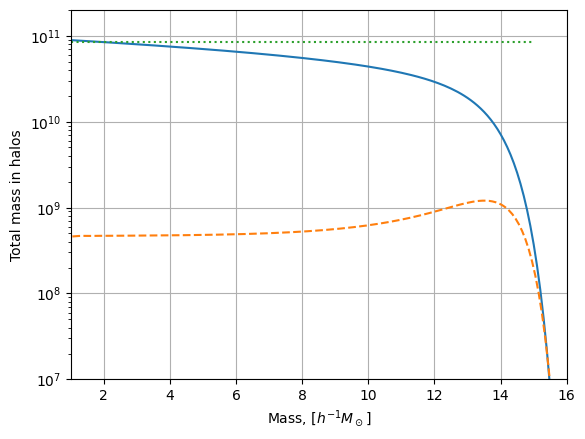

In [53]:
plt.plot(logm,ttm,'-', label="cumulative")
plt.plot((logm[1:]+logm[:-1])/2,ttm[:-1]-ttm[1:],'--',label='differential')
plt.plot([1,15],[mf.mean_density0,mf.mean_density0],':')
# plt.xscale('log')
plt.xlim(1,16)
plt.ylim(1e7,2e11)
plt.yscale('log')
plt.grid()
plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
plt.ylabel(r"Total mass in halos")

In [30]:
alltf=dict([(name, cls) for name, cls in transfer_models.__dict__.items() if isinstance(cls, type)])
alltf

{'spline': scipy.interpolate._fitpack2.InterpolatedUnivariateSpline,
 'Component': hmf._internals._framework.Component,
 'Mydouble': numpy.longdouble,
 'TransferComponent': hmf.density_field.transfer_models.TransferComponent,
 'FromFile': hmf.density_field.transfer_models.FromFile,
 'CAMB': hmf.density_field.transfer_models.CAMB,
 'FromArray': hmf.density_field.transfer_models.FromArray,
 'EH_BAO': hmf.density_field.transfer_models.EH_BAO,
 'EH_NoBAO': hmf.density_field.transfer_models.EH_NoBAO,
 'BBKS': hmf.density_field.transfer_models.BBKS,
 'BondEfs': hmf.density_field.transfer_models.BondEfs,
 'EH': hmf.density_field.transfer_models.EH}

# Effects of the transfer function

In [11]:
#calculation # gather the data in a dictionary
if os.path.isfile('ad_tfu.npy'):
    ad_tfu=np.load('ad_tfu.npy',allow_pickle=True).item()
    TrFu=['CAMB','EH_BAO','EH_NoBAO','BBKS', 'BondEfs', 'EH']
else:
    ad_tfu={}
    TrFu=['CAMB','EH_BAO','EH_NoBAO','BBKS', 'BondEfs', 'EH']
    mf_fof=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="Jenkins", lnk_min=-30, lnk_max=100,
                        transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
    mf_vir=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="ST", lnk_min=-30, lnk_max=100,
                        transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
    mf_so=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="Watson", mdef_model  = "SOCritical", mdef_params = {"overdensity": 500}, lnk_min=-30, lnk_max=100,
                       transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
    for j in TrFu:
        s8=j
        ad_tfu[s8]={}
        ad_tfu[s8]['HMF']={}; ad_tfu[s8]['HMFlog']={}; ad_tfu[s8]['IMF']={}; ad_tfu[s8]['DMF']={}; 
        for i in ad_tfu[s8].keys():
            ad_tfu[s8][i]['FOF']={}; ad_tfu[s8][i]['SOvir']={}; ad_tfu[s8][i]['SO200c']={};ad_tfu[s8][i]['SO500c']={};

        if j != 'CAMB':
            mf_fof.update(transfer_model=j, transfer_params={})
            mf_vir.update(transfer_model=j, transfer_params={})
            mf_so.update(transfer_model=j, transfer_params={})
        ad_tfu[s8]['cosmo']=mf_so.cosmo
        for name, cls in fitting_functions.__dict__.items():
            if isinstance(cls, type) and name not in ['_spline','SimDetails','FittingFunction','Mydouble']:
                if cls.get_measured_mdef() is None:
                    print('None:', name)
                    if j == 'CAMB':
                        mf_ps=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="PS", lnk_min=-30, lnk_max=100,  
                                       transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
                    else:
                        mf_ps=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="PS", lnk_min=-30, lnk_max=100, transfer_model=j,cosmo_model=cosmology.cosmo.Planck15)
                    ad_tfu[s8]['HMF']['PS'] = mf_ps.dndm
                    ad_tfu[s8]['HMFlog']['PS'] = mf_ps.dndlog10m
                    ad_tfu[s8]['HMF']['X'] = ad_tfu[s8]['HMFlog']['X'] = mf_ps.m
                    
                    xi,mi,xf,mf=cal_integ_mass(mf_ps)
                    ad_tfu[s8]['IMF']['PS'] = mi
                    ad_tfu[s8]['IMF']['X'] = xi
                    ad_tfu[s8]['DMF']['PS'] = mf
                    ad_tfu[s8]['DMF']['X'] = xf
                    
                else:            
                    # print(name, cls.get_measured_mdef().colossus_name)
                    if cls.get_measured_mdef().colossus_name == 'fof':
                        mf_fof.update( hmf_model  = name, mdef_params = {"linking_length": 0.2})
                        ad_tfu[s8]['HMF']['FOF'][name] = mf_fof.dndm
                        ad_tfu[s8]['HMFlog']['FOF'][name] = mf_fof.dndlog10m
                        if not np.array_equal(ad_tfu[s8]['HMF']['X'], mf_fof.m):
                            print('the axis is not same between HMF/X and FOF/'+name, ad_tfu[s8]['HMF']['X'], mf_fof.m)
                            
                        xi,mi,xf,mf=cal_integ_mass(mf_fof)
                        ad_tfu[s8]['IMF']['FOF'][name] = mi
                        if not np.array_equal(ad_tfu[s8]['IMF']['X'], xi):
                            print('the axis is not same between IMF/X and FOF/'+name)
                        ad_tfu[s8]['DMF']['FOF'][name] = mf
                        if not np.array_equal(ad_tfu[s8]['DMF']['X'], xf):
                            print('the axis is not same between DMF/X and FOF/'+name)
                    elif cls.get_measured_mdef().colossus_name == 'vir':
                        mf_vir.update( hmf_model  = name, mdef_params = {})
                        # print('VIR: name: ', name, ' x: ',mf_vir.m)
                        ad_tfu[s8]['HMF']['SOvir'][name] = mf_vir.dndm
                        ad_tfu[s8]['HMFlog']['SOvir'][name] = mf_vir.dndlog10m
                        if not np.array_equal(ad_tfu[s8]['HMF']['X'], mf_vir.m):
                            print('the axis is not same between HMF/X and SOvir/'+name, ad_tfu[s8]['HMF']['X'], mf_vir.m)
                            
                        xi,mi,xf,mf=cal_integ_mass(mf_vir)
                        ad_tfu[s8]['IMF']['SOvir'][name] = mi
                        if not np.array_equal(ad_tfu[s8]['IMF']['X'], xi):
                            print('the axis is not same between IMF/X and SOvir/'+name)
                        ad_tfu[s8]['DMF']['SOvir'][name] = mf
                        if not np.array_equal(ad_tfu[s8]['DMF']['X'], xf):
                            print('the axis is not same between DMF/X and SOvir/'+name)
        
                    elif cls.get_measured_mdef().colossus_name is None:
                        mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 200})
                        ad_tfu[s8]['HMF']['SO200c'][name] = mf_so.dndm
                        ad_tfu[s8]['HMFlog']['SO200c'][name] = mf_so.dndlog10m
                        if not np.array_equal(ad_tfu[s8]['HMF']['X'], mf_so.m):
                            print('the axis is not same between HMF/X and SO200c/'+name, ad_tfu[s8]['HMF']['X'], mf_so.m)
                            
                        xi,mi,xf,mf=cal_integ_mass(mf_so)
                        ad_tfu[s8]['IMF']['SO200c'][name] = mi
                        if not np.array_equal(ad_tfu[s8]['IMF']['X'], xi):
                            print('the axis is not same between IMF/X and SO200c/'+name)
                        ad_tfu[s8]['DMF']['SO200c'][name] = mf
                        if not np.array_equal(ad_tfu[s8]['DMF']['X'], xf):
                            print('the axis is not same between DMF/X and SO200c/'+name)
                            
                        mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 500})
                        ad_tfu[s8]['HMF']['SO500c'][name] = mf_so.dndm
                        ad_tfu[s8]['HMFlog']['SO500c'][name] = mf_so.dndlog10m
                        if not np.array_equal(ad_tfu[s8]['HMF']['X'], mf_so.m):
                            print('the axis is not same between HMF/X and SO500c/'+name, ad_tfu[s8]['HMF']['X'], mf_so.m)
                            
                        xi,mi,xf,mf=cal_integ_mass(mf_so)
                        ad_tfu[s8]['IMF']['SO500c'][name] = mi
                        if not np.array_equal(ad_tfu[s8]['IMF']['X'], xi):
                            print('the axis is not same between IMF/X and SO500c/'+name)
                        ad_tfu[s8]['DMF']['SO500c'][name] = mf
                        if not np.array_equal(ad_tfu[s8]['DMF']['X'], xf):
                            print('the axis is not same between DMF/X and SO500c/'+name)
                    else:
                        if '200m' in name:
                            continue
        
                        if '200c' in name:
                            mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 200})
                            ad_tfu[s8]['HMF']['SO200c'][name] = mf_so.dndm
                            ad_tfu[s8]['HMFlog']['SO200c'][name] = mf_so.dndlog10m
                            if not np.array_equal(ad_tfu[s8]['HMF']['X'], mf_so.m):
                                print('the axis is not same between HMF/X and SO200c/'+name, ad_tfu[s8]['HMF']['X'], mf_so.m)
                                
                            xi,mi,xf,mf=cal_integ_mass(mf_so)
                            ad_tfu[s8]['IMF']['SO200c'][name] = mi
                            if not np.array_equal(ad_tfu[s8]['IMF']['X'], xi):
                                print('the axis is not same between IMF/X and SO200c/'+name)
                            ad_tfu[s8]['DMF']['SO200c'][name] = mf
                            if not np.array_equal(ad_tfu[s8]['DMF']['X'], xf):
                                print('the axis is not same between DMF/X and SO200c/'+name)
                        else:
                            mf_so.update( hmf_model  = name, mdef_params = {"overdensity": 500})
                            ad_tfu[s8]['HMF']['SO500c'][name] = mf_so.dndm
                            ad_tfu[s8]['HMFlog']['SO500c'][name] = mf_so.dndlog10m
                            if not np.array_equal(ad_tfu[s8]['HMF']['X'], mf_so.m):
                                print('the axis is not same between HMF/X and SO500c/'+name, ad_tfu[s8]['HMF']['X'], mf_so.m)
                                
                            xi,mi,xf,mf=cal_integ_mass(mf_so)
                            ad_tfu[s8]['IMF']['SO500c'][name] = mi
                            if not np.array_equal(ad_tfu[s8]['IMF']['X'], xi):
                                print('the axis is not same between IMF/X and SO500c/'+name)
                            ad_tfu[s8]['DMF']['SO500c'][name] = mf
                            if not np.array_equal(ad_tfu[s8]['DMF']['X'], xf):
                                print('the axis is not same between DMF/X and SO500c/'+name)
    np.save('ad_tfu',ad_tfu)


/tmp/ipykernel_249522/131815422.py:15: RuntimeWarning: divide by zero encountered in divide
  axs[i*2+1].plot(ad_tfu[s8][hn]['X'], ad_tfu[s8][hn]['FOF']['Angulo']/nm2/ad_tfu['EH_BAO'][hn]['FOF']['Angulo']*nm1,ls='-',color=p[0].get_color())
/tmp/ipykernel_249522/131815422.py:15: RuntimeWarning: invalid value encountered in divide
  axs[i*2+1].plot(ad_tfu[s8][hn]['X'], ad_tfu[s8][hn]['FOF']['Angulo']/nm2/ad_tfu['EH_BAO'][hn]['FOF']['Angulo']*nm1,ls='-',color=p[0].get_color())
/tmp/ipykernel_249522/131815422.py:18: RuntimeWarning: divide by zero encountered in divide
  axs[i*2+1].loglog(ad_tfu[s8][hn]['X'], ad_tfu[s8][hn]['SOvir']['Behroozi']/nm2/ad_tfu['EH_BAO'][hn]['SOvir']['Behroozi']*nm1,ls='--',color=p[0].get_color())
/tmp/ipykernel_249522/131815422.py:18: RuntimeWarning: invalid value encountered in divide
  axs[i*2+1].loglog(ad_tfu[s8][hn]['X'], ad_tfu[s8][hn]['SOvir']['Behroozi']/nm2/ad_tfu['EH_BAO'][hn]['SOvir']['Behroozi']*nm1,ls='--',color=p[0].get_color())
/tmp/ipykernel_24952

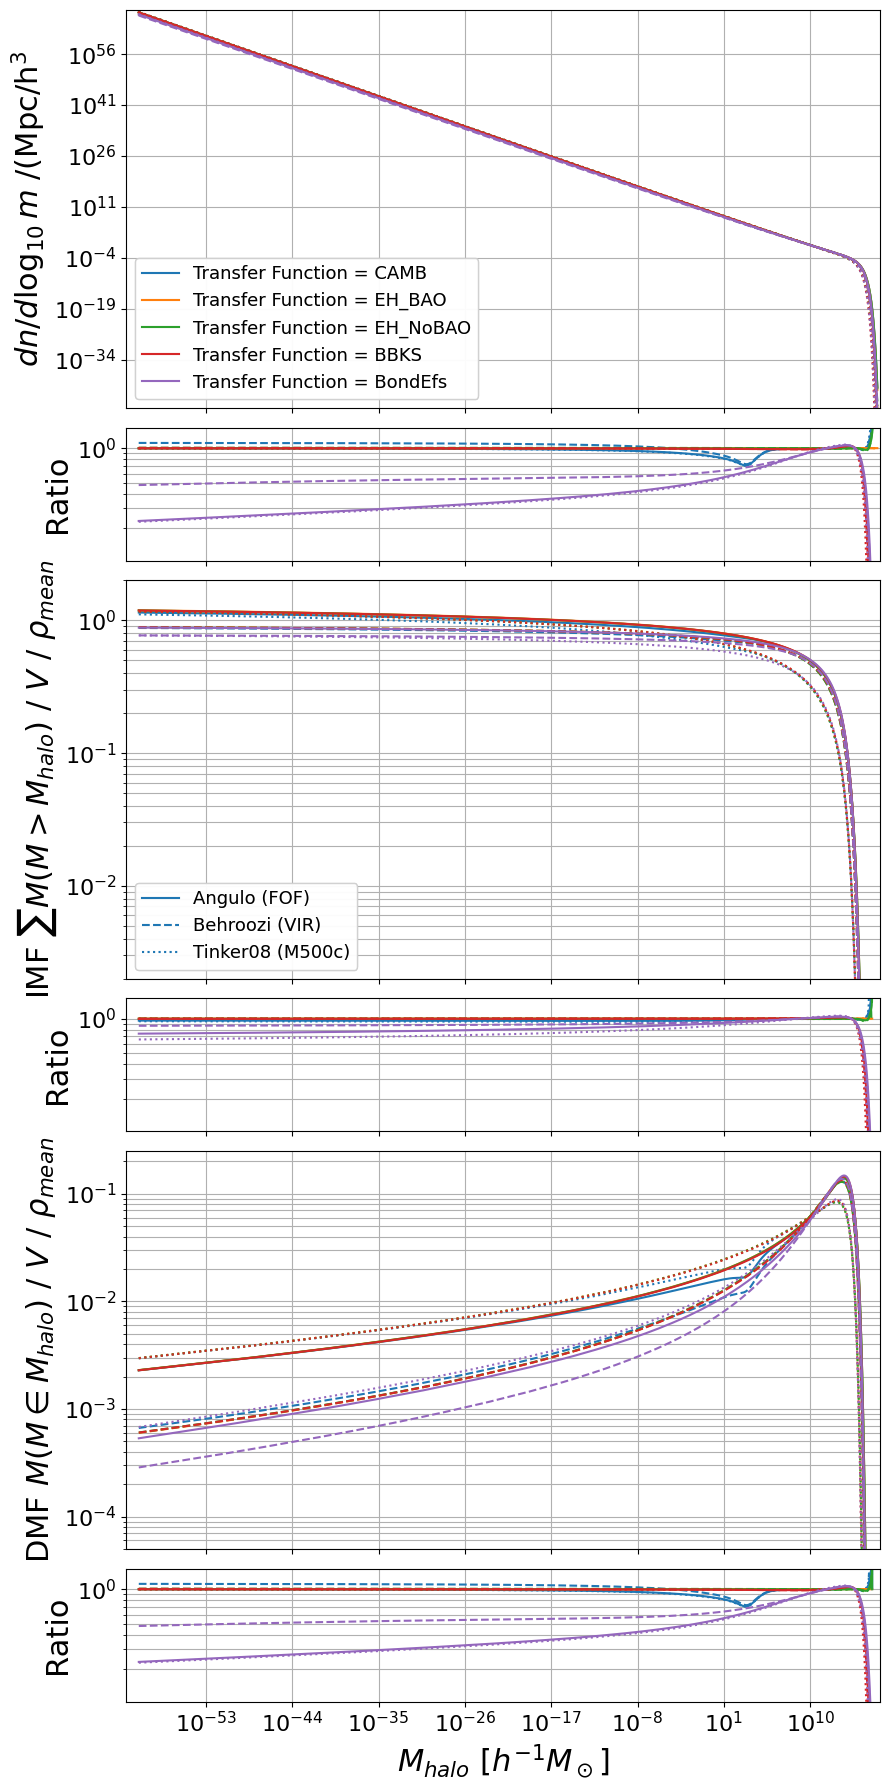

In [22]:
# Do the plots
fig, axs = plt.subplots(6, 1, figsize=(9, 18),  sharey='row', sharex='col', gridspec_kw={'height_ratios': [3, 1, 3, 1, 3, 1]})
md=cal_mean_dens(ad_tfu['CAMB']['cosmo'])

for j in TrFu[:-1]:
    s8=j
    mdc=cal_mean_dens(ad_tfu[s8]['cosmo'])
    for i, hn in enumerate(['HMFlog', 'IMF', 'DMF']):
        if i == 0:
            nm1=1; nm2=1
        else:
            nm1=md; nm2=mdc
            
        p=axs[i*2].loglog(ad_tfu[s8][hn]['X'], ad_tfu[s8][hn]['FOF']['Angulo']/nm2, ls='-')
        axs[i*2+1].plot(ad_tfu[s8][hn]['X'], ad_tfu[s8][hn]['FOF']['Angulo']/nm2/ad_tfu['EH_BAO'][hn]['FOF']['Angulo']*nm1,ls='-',color=p[0].get_color())
        
        axs[i*2].loglog(ad_tfu[s8][hn]['X'], ad_tfu[s8][hn]['SOvir']['Behroozi']/nm2, ls='--', color=p[0].get_color())
        axs[i*2+1].loglog(ad_tfu[s8][hn]['X'], ad_tfu[s8][hn]['SOvir']['Behroozi']/nm2/ad_tfu['EH_BAO'][hn]['SOvir']['Behroozi']*nm1,ls='--',color=p[0].get_color())
    
        axs[i*2].loglog(ad_tfu[s8][hn]['X'], ad_tfu[s8][hn]['SO500c']['Tinker08']/nm2, ls=':', color=p[0].get_color())
        axs[i*2+1].loglog(ad_tfu[s8][hn]['X'], ad_tfu[s8][hn]['SO500c']['Tinker08']/nm2/ad_tfu['EH_BAO'][hn]['SO500c']['Tinker08']*nm1,ls=':',color=p[0].get_color())

# for axx in [axs[1], axs[3], axs[5]]:
#     axx.plot([1e-9,1e17],[1,1], 'k-')

lines = axs[0].get_lines()
legend2 = axs[0].legend([lines[i] for i in np.arange(0,3*(len(TrFu)-1),3)], [r'Transfer Function = '+i for i in TrFu], fontsize=13)
axs[0].add_artist(legend2)

lines = axs[2].get_lines()
legend1 = axs[2].legend([lines[i] for i in [0,1,2]], ["Angulo (FOF)", "Behroozi (VIR)", "Tinker08 (M500c)"], fontsize=13)
axs[2].add_artist(legend1)

for axx in axs:
    axx.grid(which='both')
# axs[0].set_ylim(5e-50,1e20)
axs[0].set_ylim(5e-49,1e69)
axs[0].set_xlim(5e-62,2e17)
axs[2].set_ylim(2e-3,2)
axs[4].set_ylim(5e-5,0.25)
axs[1].set_ylim(1.05e-1,1.5)
axs[3].set_ylim(1.05e-1,1.5)
axs[5].set_ylim(1.05e-1,1.5)

# axs[0].set_ylabel(r"$dn/dm$ $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$",fontsize=22)
axs[0].set_ylabel(r"$dn/d\log_{10} m \ / ({\rm Mpc/h}^{3}$",fontsize=22)

axs[1].set_ylabel(r"Ratio",fontsize=22)
axs[2].set_ylabel(r"IMF $\sum M(M>M_{halo}) \ / \ V \ / \ \rho_{mean}$",fontsize=22)
axs[3].set_ylabel(r"Ratio",fontsize=22)
axs[4].set_ylabel(r"DMF $M (M \in M_{halo}) \ / \ V \ / \ \rho_{mean}$",fontsize=22)
axs[5].set_ylabel(r"Ratio",fontsize=22)
axs[5].set_xlabel(r"$M_{halo}\ [h^{-1}M_\odot]$",fontsize=22)

fig.tight_layout()
fig.savefig('TrFu_mfs.pdf',dpi=300)

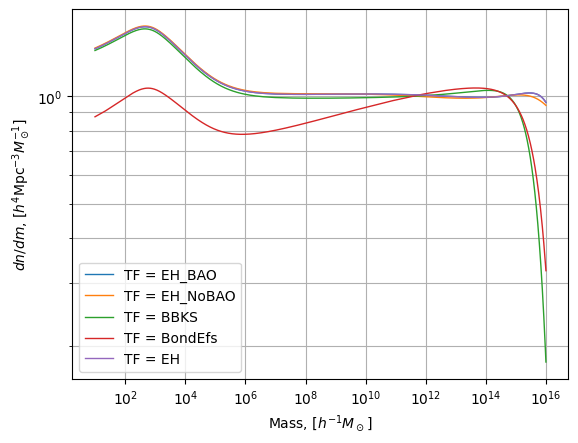

In [7]:
# For vir
mfCAMB=MassFunction(Mmin=1,Mmax=16,z=0,hmf_model="ST",   transfer_model='CAMB',  transfer_params={"kmax": 1000, "extrapolate_with_eh": True})
for i in alltf.keys():
    if i in ['spline', 'Component', 'TransferComponent', 'FromFile', 'FromArray', 'CAMB']:
        continue

    mfEH=MassFunction(Mmin=1,Mmax=16,z=0,hmf_model="ST",   transfer_model=i)
    plt.plot(mfEH.m,mfEH.dndm/mfCAMB.dndm, label='TF = '+i, lw=1)
plt.grid(which='both')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
plt.ylabel(r"$dn/dm$, $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$");

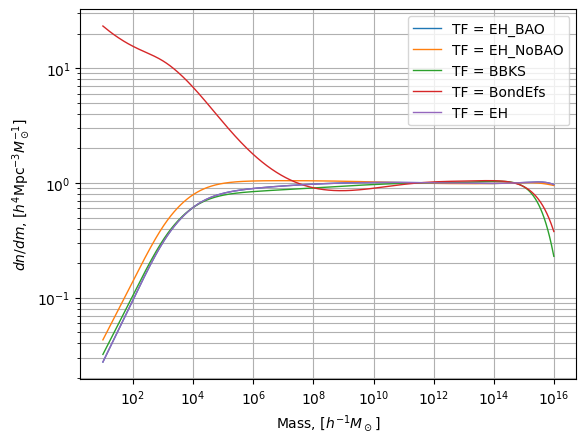

In [55]:
# For FOF
mfCAMB=MassFunction(Mmin=1,Mmax=16,z=0,hmf_model="Jenkins",   transfer_model='CAMB',  transfer_params={"kmax": 1000, "extrapolate_with_eh": True})
for i in alltf.keys():
    if i in ['spline', 'Component', 'TransferComponent', 'FromFile', 'FromArray', 'CAMB']:
        continue
    # mfTD=MassFunction(Mmin=10,Mmax=16,z=0,hmf_model="Tinker08",    mdef_model  = "SOCritical",  mdef_params = {"overdensity": 500})
    mfEH=MassFunction(Mmin=1,Mmax=16,z=0,hmf_model="Jenkins",   transfer_model=i)
    # if i =='BBKS':
    #     mf=np.copy(mfEH.dndm)
    # plt.plot(mfTD.m,mfTD.dndm, label='TF=Default')
    plt.plot(mfEH.m,mfEH.dndm/mfCAMB.dndm, label='TF = '+i, lw=1)
plt.grid(which='both')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
plt.ylabel(r"$dn/dm$, $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$");

In [34]:
def cal_integ_mass(mft, minm=0.1,maxm=16):
    logm=np.arange(minm,maxm, 0.2)
    ttm=np.copy(logm)
    for i in range(logm.size):
        # mft=MassFunction(Mmin=logm[i],Mmax=35,z=0,hmf_model='Angulo')
        mft.Mmin=logm[i]
        ttm[i]=integrate.simpson(mft.dndm*mft.m,mft.m) 
    return logm, ttm, (logm[1:]+logm[:-1])/2,ttm[:-1]-ttm[1:]


# check the effect of TF on Integ mass

Text(0, 0.5, 'Diff to CAMB')

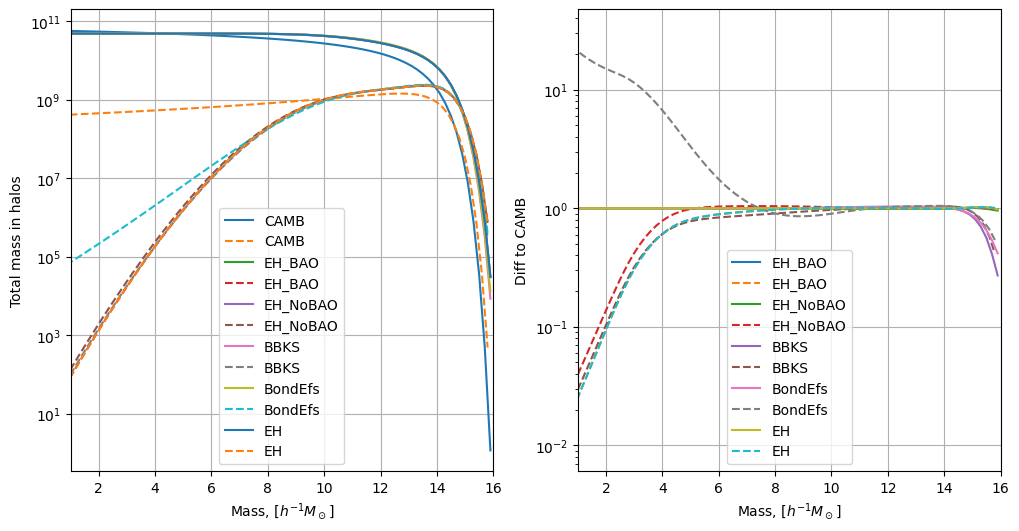

In [38]:
#For FOF
fig=plt.figure(figsize=(12,6))
mfCAMB=MassFunction(Mmin=1,Mmax=16,z=0,hmf_model="Jenkins",   transfer_model='CAMB',  transfer_params={"kmax": 1000, "extrapolate_with_eh": True})
xi_camb,mi_camb,xf_camb,mf_camb=cal_integ_mass(mfCAMB)
plt.subplot(121)
plt.plot(xi,mi,'-', label="CAMB")
plt.plot(xf,mf,'--',label='CAMB')
mfEH=MassFunction(Mmin=1,Mmax=16,z=0, hmf_model="Jenkins", transfer_model='EH')
for i in alltf.keys():
    if i in ['spline', 'Component', 'TransferComponent', 'FromFile', 'FromArray', 'CAMB']:
        continue
    # mfTD=MassFunction(Mmin=10,Mmax=16,z=0,hmf_model="Tinker08",    mdef_model  = "SOCritical",  mdef_params = {"overdensity": 500})
    # mfEH=MassFunction(Mmin=1,Mmax=16,z=0, hmf_model="Tinker08", mdef_model  = "SOCritical", mdef_params = {"overdensity": 500}, transfer_model=i)
    mfEH.transfer_model=i
    xi,mi,xf,mf=cal_integ_mass(mfEH)
    plt.subplot(121)
    plt.plot(xi,mi,'-', label=i)
    plt.plot(xf,mf,'--',label=i)
    plt.subplot(122)
    plt.plot(xi,mi/mi_camb,'-', label=i)
    plt.plot(xf,mf/mf_camb,'--',label=i)
    # plt.plot(mfEH.m,mfEH.dndm/mfCAMB.dndm, label='TF = '+i, lw=1)

# plt.plot(logm,ttm,'-', label="cumulative")
# plt.plot((logm[1:]+logm[:-1])/2,ttm[:-1]-ttm[1:],'--',label='differential')
# plt.plot([1,15],[mf.mean_density0,mf.mean_density0],':')
# plt.xscale('log')
plt.subplot(121)
plt.xlim(1,16)
# plt.ylim(1e7,2e11)
plt.yscale('log')
plt.legend()
plt.grid()
plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
plt.ylabel(r"Total mass in halos")
plt.subplot(122)
plt.xlim(1,16)
# plt.ylim(1e7,2e11)
plt.yscale('log')
plt.legend()
plt.grid()
plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
plt.ylabel(r"Diff to CAMB")

Text(0, 0.5, 'Total mass in halos')

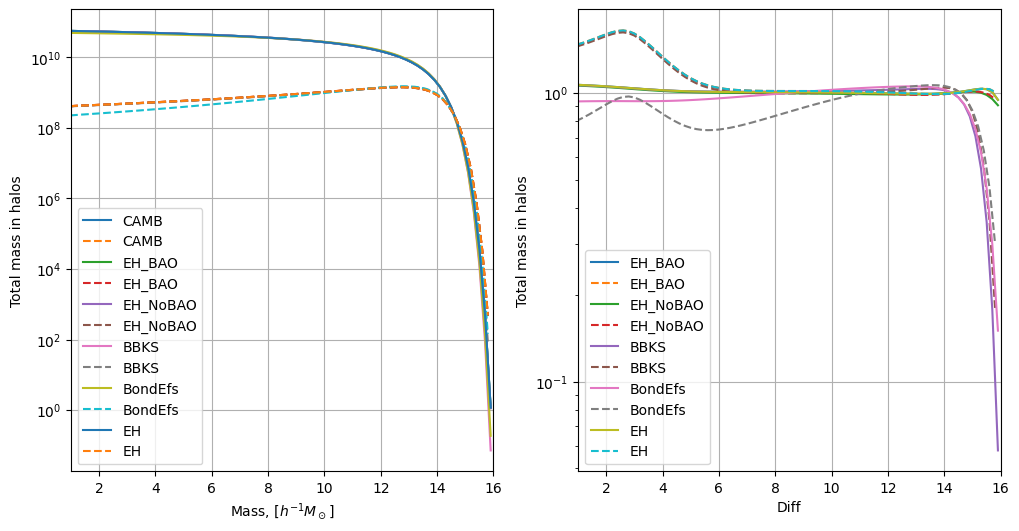

In [37]:
# For SO
fig=plt.figure(figsize=(12,6))
mfCAMB=MassFunction(Mmin=1,Mmax=16,z=0, hmf_model="Tinker08", mdef_model  = "SOCritical", mdef_params = {"overdensity": 500}, 
                    transfer_model='CAMB', transfer_params={"kmax": 1000, "extrapolate_with_eh": True})
xi_camb,mi_camb,xf_camb,mf_camb=cal_integ_mass(mfCAMB)
plt.subplot(121)
plt.plot(xi,mi,'-', label="CAMB")
plt.plot(xf,mf,'--',label='CAMB')
mfEH=MassFunction(Mmin=1,Mmax=16,z=0, hmf_model="Tinker08", mdef_model  = "SOCritical", mdef_params = {"overdensity": 500}, transfer_model='EH')
for i in alltf.keys():
    if i in ['spline', 'Component', 'TransferComponent', 'FromFile', 'FromArray', 'CAMB']:
        continue
    # mfTD=MassFunction(Mmin=10,Mmax=16,z=0,hmf_model="Tinker08",    mdef_model  = "SOCritical",  mdef_params = {"overdensity": 500})
    # mfEH=MassFunction(Mmin=1,Mmax=16,z=0, hmf_model="Tinker08", mdef_model  = "SOCritical", mdef_params = {"overdensity": 500}, transfer_model=i)
    mfEH.transfer_model=i
    xi,mi,xf,mf=cal_integ_mass(mfEH)
    plt.subplot(121)
    plt.plot(xi,mi,'-', label=i)
    plt.plot(xf,mf,'--',label=i)
    plt.subplot(122)
    plt.plot(xi,mi/mi_camb,'-', label=i)
    plt.plot(xf,mf/mf_camb,'--',label=i)
    # plt.plot(mfEH.m,mfEH.dndm/mfCAMB.dndm, label='TF = '+i, lw=1)

# plt.plot(logm,ttm,'-', label="cumulative")
# plt.plot((logm[1:]+logm[:-1])/2,ttm[:-1]-ttm[1:],'--',label='differential')
# plt.plot([1,15],[mf.mean_density0,mf.mean_density0],':')
# plt.xscale('log')
plt.subplot(121)
plt.xlim(1,16)
# plt.ylim(1e7,2e11)
plt.yscale('log')
plt.legend()
plt.grid()
plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
plt.ylabel(r"Total mass in halos")
plt.subplot(122)
plt.xlim(1,16)
# plt.ylim(1e7,2e11)
plt.yscale('log')
plt.legend()
plt.grid()
plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
plt.ylabel(r"Diff to CAMB")

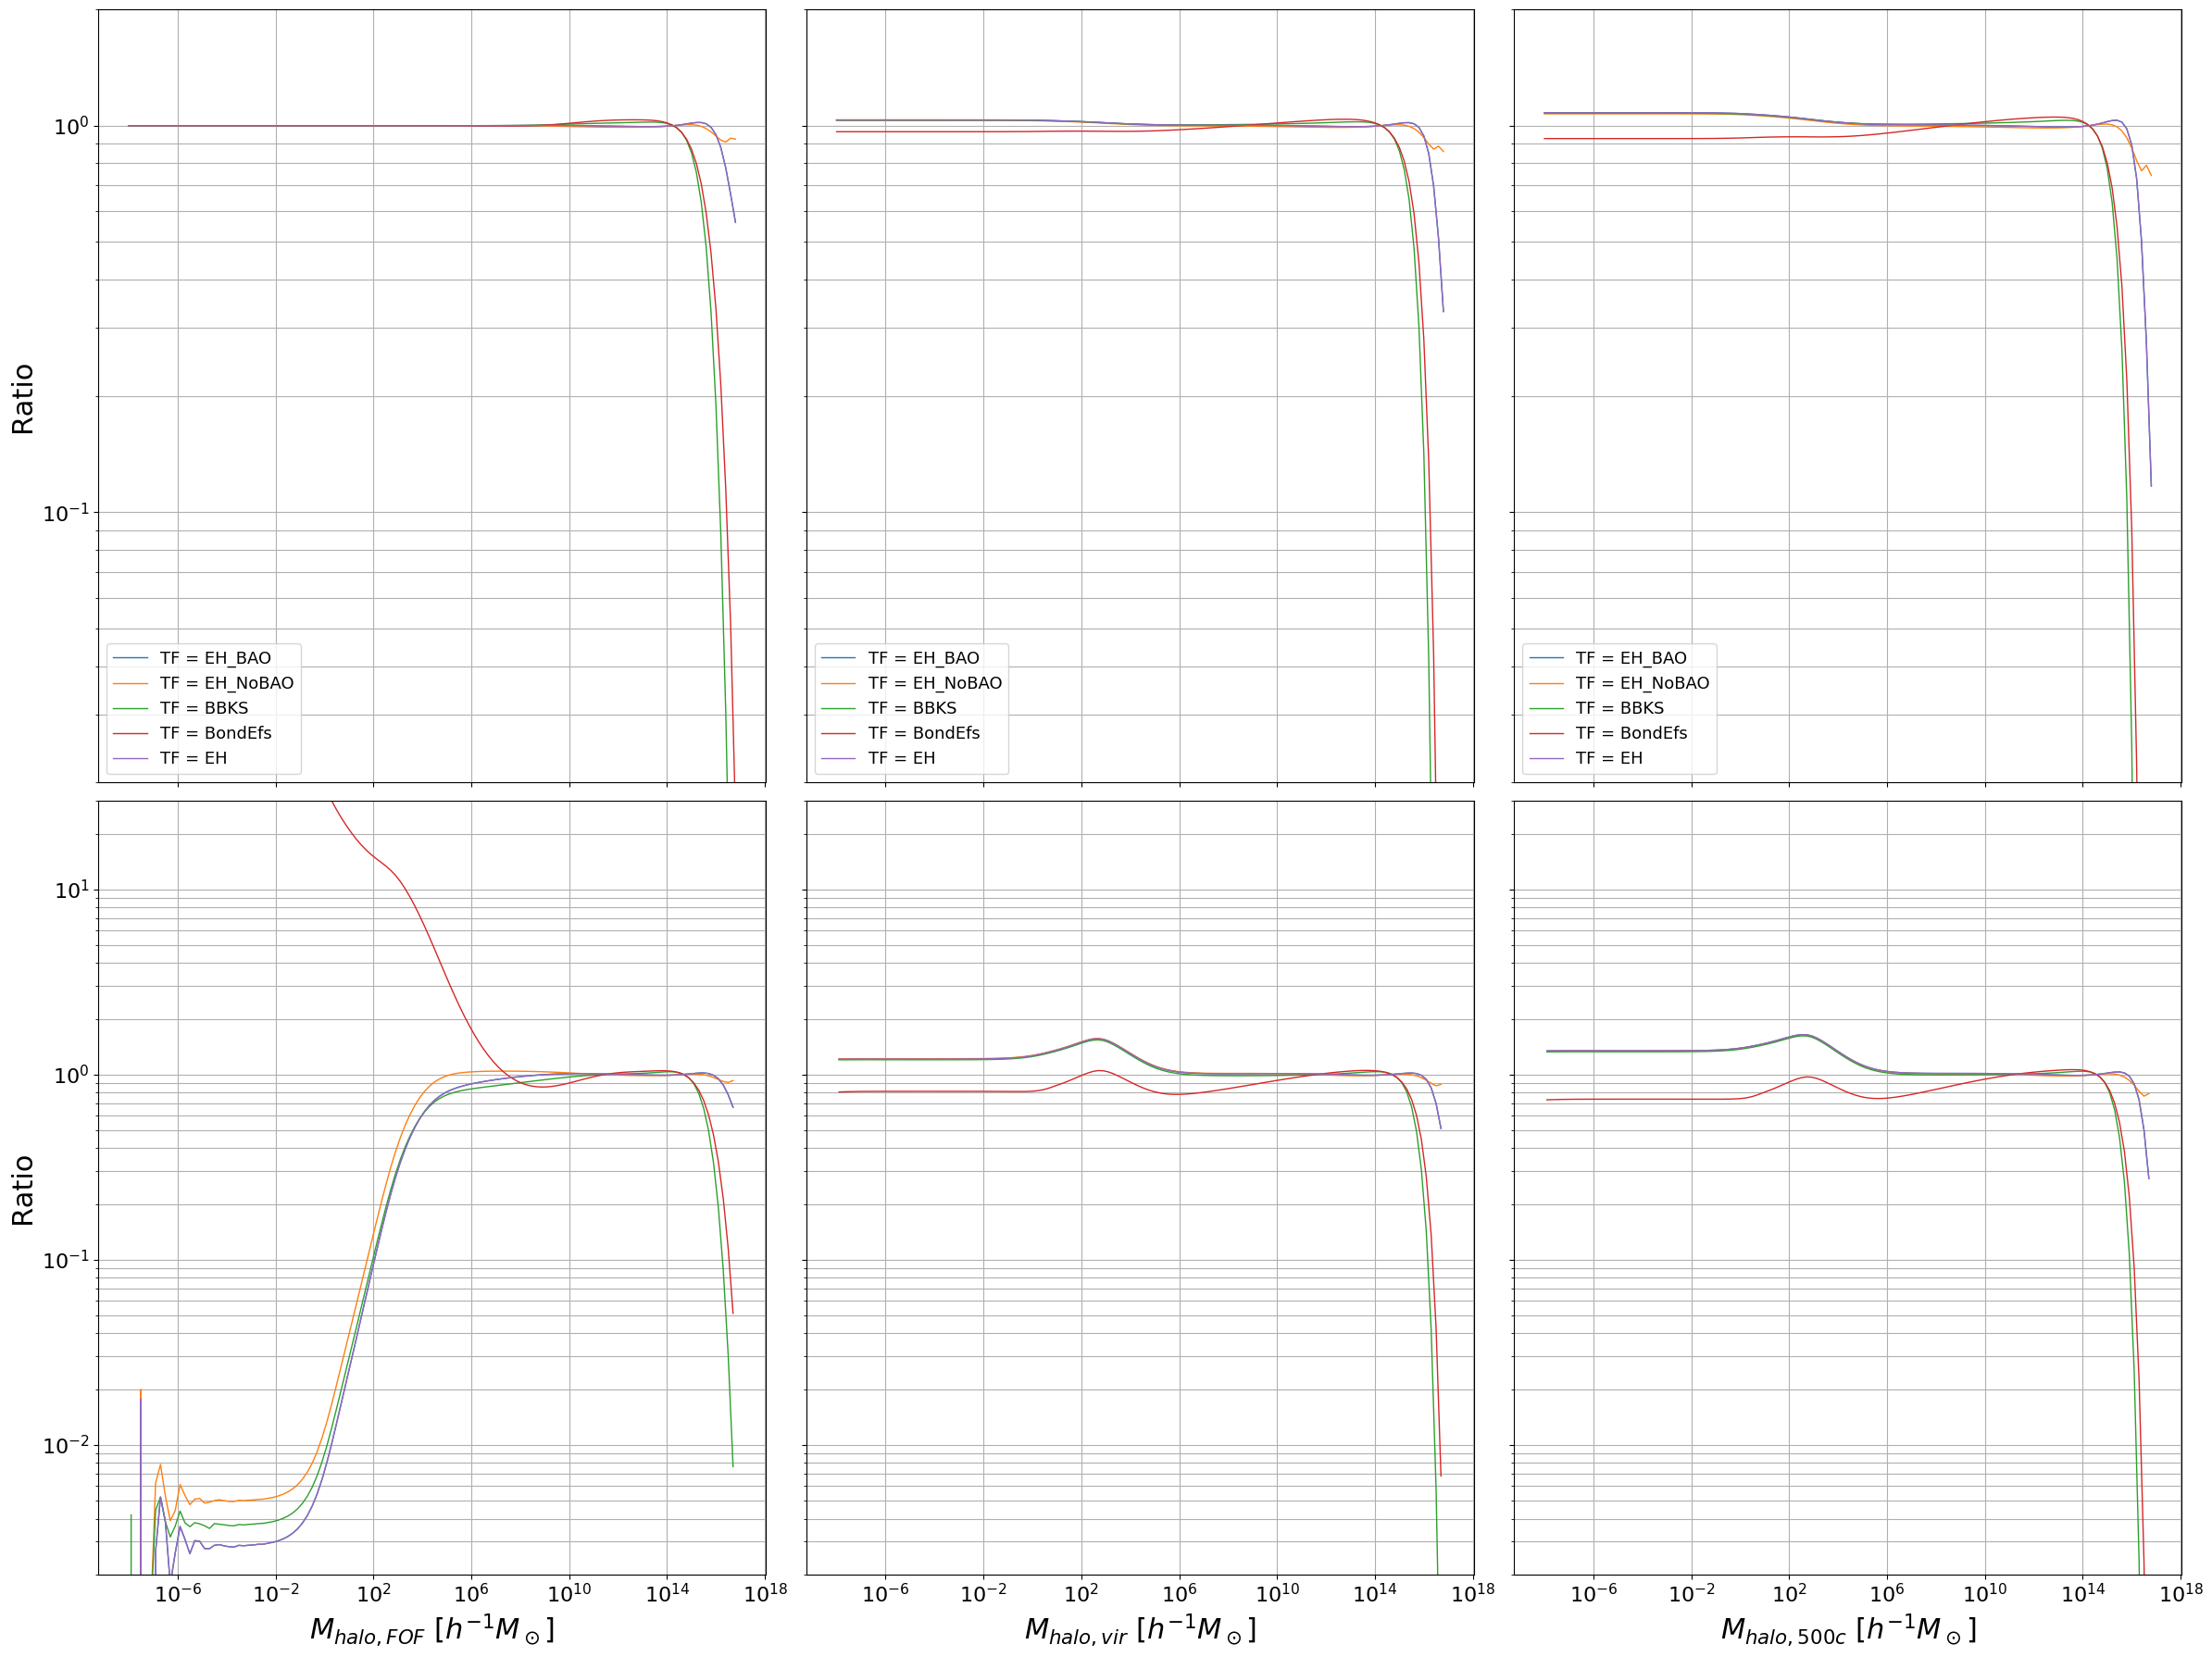

In [63]:
#For SO
fig, axs = plt.subplots(2, 3, figsize=(24, 18),  sharey='row', sharex='col')

mfCAMB=MassFunction(Mmin=-8,Mmax=17,z=0, hmf_model="Tinker08", mdef_model  = "SOCritical", mdef_params = {"overdensity": 500}, 
                    transfer_model='CAMB', transfer_params={"kmax": 1000, "extrapolate_with_eh": True})
xiCAMB,miCAMB,xfCAMB,mfCAMB=cal_integ_mass(mfCAMB,minm=-8,maxm=17)
for i in alltf.keys():
    if i in ['spline', 'Component', 'TransferComponent', 'FromFile', 'FromArray', 'CAMB']:
        continue
    # mfTD=MassFunction(Mmin=10,Mmax=16,z=0,hmf_model="Tinker08",    mdef_model  = "SOCritical",  mdef_params = {"overdensity": 500})
    mfEH=MassFunction(Mmin=-8,Mmax=17,z=0, hmf_model="Tinker08", mdef_model  = "SOCritical", mdef_params = {"overdensity": 500}, transfer_model=i)
    xiEH,miEH,xfEH,mfEH=cal_integ_mass(mfEH,minm=-8,maxm=17)
    p=axs[0,2].plot(xiEH, miEH/miCAMB, label='TF = '+i, lw=1)
    axs[1,2].plot(xfEH, mfEH/mfCAMB, label='TF = '+i, lw=1, color=p[0].get_color())
    
# axs[2].grid(which='both')
# axs[2].set_xscale('log')
# axs[2].set_yscale('log')
axs[0, 2].legend(fontsize=13)
axs[1, 2].set_xlabel(r"$M_{halo, 500c}$ $[h^{-1}M_\odot]$", fontsize=22)
# axs[2].ylabel(r"$dn/dm$, $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$")


mfCAMB=MassFunction(Mmin=-8,Mmax=17,z=0,hmf_model="ST",   transfer_model='CAMB',  transfer_params={"kmax": 1000, "extrapolate_with_eh": True})
xiCAMB,miCAMB,xfCAMB,mfCAMB=cal_integ_mass(mfCAMB,minm=-8,maxm=17)
for i in alltf.keys():
    if i in ['spline', 'Component', 'TransferComponent', 'FromFile', 'FromArray', 'CAMB']:
        continue

    mfEH=MassFunction(Mmin=-8,Mmax=17,z=0,hmf_model="ST",   transfer_model=i)
    xiEH,miEH,xfEH,mfEH=cal_integ_mass(mfEH,minm=-8,maxm=17)
    p=axs[0,1].plot(xiEH, miEH/miCAMB, label='TF = '+i, lw=1)
    axs[1,1].plot(xfEH, mfEH/mfCAMB, label='TF = '+i, lw=1, color=p[0].get_color())

# axs[1].grid(which='both')
# axs[1].set_xscale('log')
# axs[1].set_yscale('log')
axs[0,1].legend(fontsize=13)
axs[1,1].set_xlabel(r"$M_{halo, vir}$ $[h^{-1}M_\odot]$", fontsize=22)
# axs[1].ylabel(r"$dn/dm$, $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$")


mfCAMB=MassFunction(Mmin=-8,Mmax=17,z=0,hmf_model="Jenkins",   transfer_model='CAMB',  transfer_params={"kmax": 1000, "extrapolate_with_eh": True})
xiCAMB,miCAMB,xfCAMB,mfCAMB=cal_integ_mass(mfCAMB,minm=-8,maxm=17)
for i in alltf.keys():
    if i in ['spline', 'Component', 'TransferComponent', 'FromFile', 'FromArray', 'CAMB']:
        continue
    # mfTD=MassFunction(Mmin=10,Mmax=16,z=0,hmf_model="Tinker08",    mdef_model  = "SOCritical",  mdef_params = {"overdensity": 500})
    mfEH=MassFunction(Mmin=-8,Mmax=17,z=0,hmf_model="Jenkins",   transfer_model=i)
    xiEH,miEH,xfEH,mfEH=cal_integ_mass(mfEH,minm=-8,maxm=17)

    p=axs[0,0].plot(xiEH, miEH/miCAMB, label='TF = '+i, lw=1)
    axs[1,0].plot(xfEH, mfEH/mfCAMB, label='TF = '+i, lw=1, color=p[0].get_color())

for axx in axs.flatten():
    axx.grid(which='both')
    axx.set_xscale('log')
    axx.set_yscale('log')
    
axs[0,0].legend(fontsize=13)
axs[1, 0].set_xlabel(r"$M_{halo, FOF}$ $[h^{-1}M_\odot]$", fontsize=22)
axs[0,0].set_ylabel(r"Ratio", fontsize=22)
axs[1,0].set_ylabel(r"Ratio", fontsize=22)
axs[0,0].set_ylim(2e-2,2)
axs[1,0].set_ylim(2e-3,30)

fig.tight_layout()
fig.savefig('com_idmf_TF.pdf', dpi=300)

/home2/weiguang/.local/lib/python3.8/site-packages/hmf/mass_function/hmf.py:299: UserWarning: Your input mass definition 'SOCritical(500)' does not match the mass definition in which the hmf fit ST was measured:'SOVirial'. The mass function will be converted to your input definition, but note that some properties do not survive the conversion, eg. the integral of the hmf over mass yielding the total mean density.
  warnings.warn(
/home2/weiguang/.local/lib/python3.8/site-packages/halomod/halo_exclusion.py:18: UserWarning: Warning: Some Halo-Exclusion models have significant speedup when using Numba
  warnings.warn(


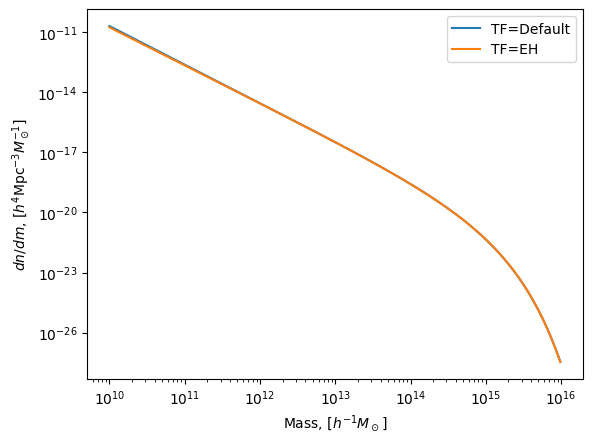

In [22]:
mfTD=MassFunction(Mmin=10,Mmax=16,z=0,hmf_model="ST",    mdef_model  = "SOCritical",  mdef_params = {"overdensity": 500}, disable_mass_conversion=False)
mfEH=MassFunction(Mmin=10,Mmax=16,z=0,hmf_model="ST",    mdef_model  = "SOCritical",  mdef_params = {"overdensity": 500}, transfer_model='EH',disable_mass_conversion=False)
plt.plot(mfTD.m,mfTD.dndm, label='TF=Default')
plt.plot(mfEH.m,mfEH.dndm, label='TF=EH')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
plt.ylabel(r"$dn/dm$, $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$");

# pushing to Gev ~ 10^-60 Msun!

In [7]:
mfCAMB_T08=MassFunction(Mmin=-60,Mmax=17,z=0, hmf_model="Tinker08", mdef_model  = "SOCritical", mdef_params = {"overdensity": 500},  lnk_min=-50, lnk_max=100,
                        transfer_model='CAMB', transfer_params={"kmax": 500, "extrapolate_with_eh": True})
xiCAMB_T08,miCAMB_T08, fmCAMB_T08=cal_integ_mass(mfCAMB_T08,minm=-60,maxm=17)

mfCAMB_ST=MassFunction(Mmin=-60,Mmax=17,z=0,hmf_model="ST",  lnk_min=-50, lnk_max=100, 
                       transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True})
xiCAM_ST,miCAMB_ST, fmCAMB_ST=cal_integ_mass(mfCAMB_ST,minm=-60,maxm=17)

mfCAMB_Ang=MassFunction(Mmin=-60,Mmax=17,z=0,hmf_model="Angulo",   lnk_min=-50, lnk_max=100,
                        transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True})
xiCAMB_Ang,miCAMB_Ang, fmCAMB_Ang=cal_integ_mass(mfCAMB_Ang,minm=-60,maxm=17)

[Text(0.5, 0, 'Mass, $[h^{-1}M_\\odot]$'),
 Text(0.5, 0, 'Mass, $[h^{-1}M_\\odot]$'),
 Text(0.5, 0, 'Mass, $[h^{-1}M_\\odot]$')]

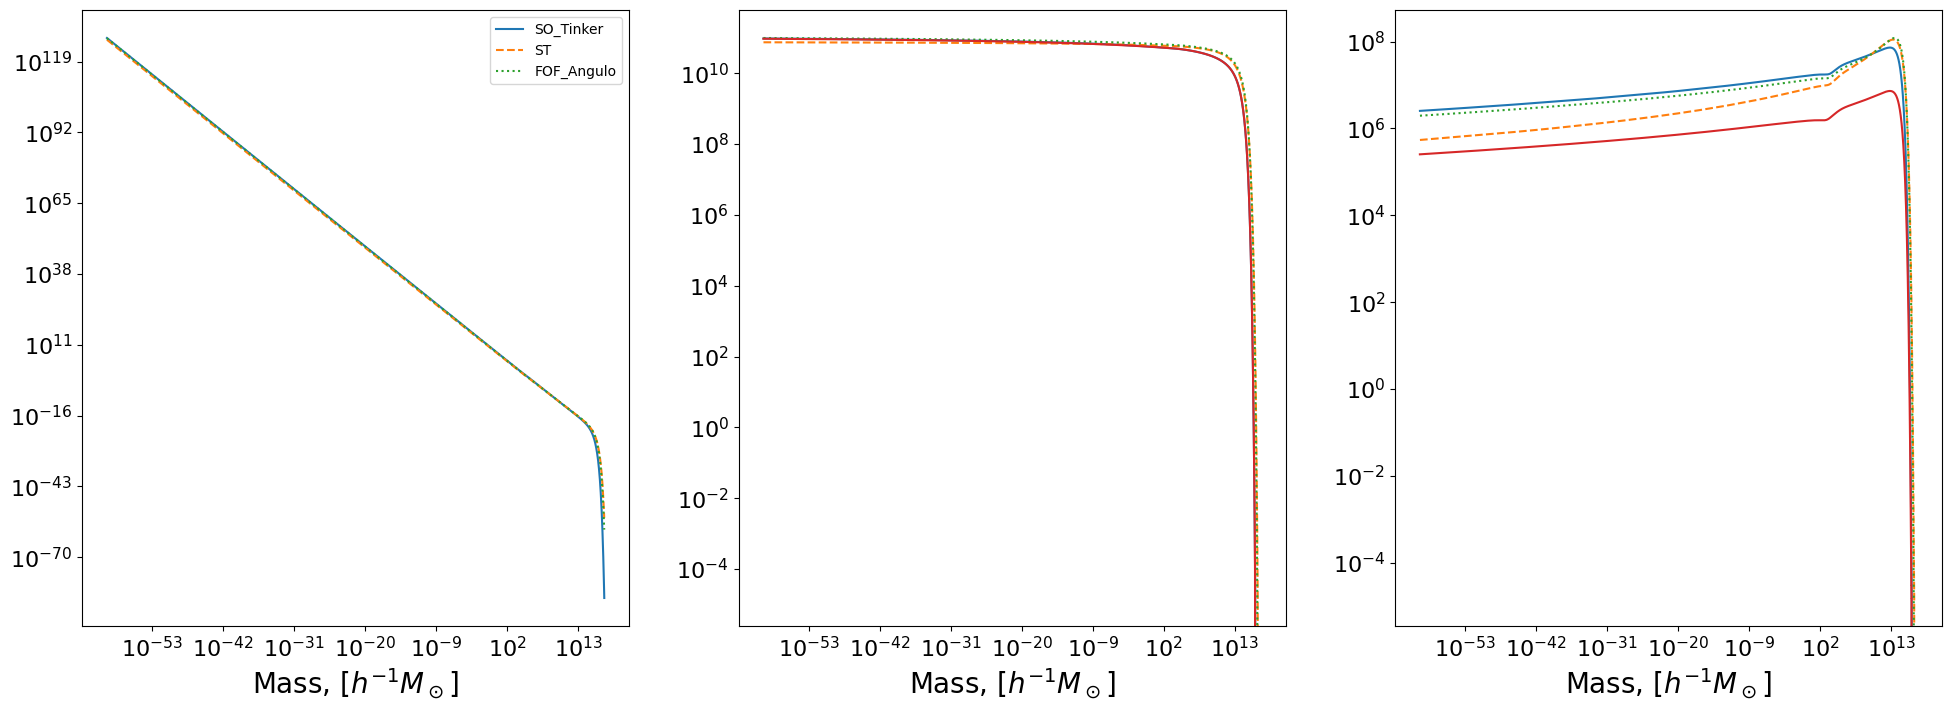

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8), sharex='col')

axs[0].loglog(mfCAMB_T08.m,mfCAMB_T08.dndm, ls='-', label='SO_Tinker')
axs[0].loglog(mfCAMB_ST.m,mfCAMB_ST.dndm, ls='--', label='ST')
axs[0].loglog(mfCAMB_Ang.m,mfCAMB_Ang.dndm, ls=':', label='FOF_Angulo')

axs[1].loglog(xiCAMB_T08, miCAMB_T08,'-', label='SO_Tinker')
axs[1].loglog(xiCAM_ST, miCAMB_ST,'--', label='ST')
axs[1].loglog(xiCAMB_Ang, miCAMB_Ang,':', label='FOF_Angulo')
axs[1].loglog(xiCAMB2_T08, miCAMB2_T08,'-', label='SO_Tinker')

axs[2].loglog(xiCAMB_T08, fmCAMB_T08,'-', label='SO_Tinker')
axs[2].loglog(xiCAM_ST, fmCAMB_ST,'--', label='ST')
axs[2].loglog(xiCAMB_Ang, fmCAMB_Ang,':', label='FOF_Angulo')
axs[2].loglog(xiCAMB2_T08, fmCAMB2_T08,'-', label='SO_Tinker')


axs[0].legend()
[ass.set_xlabel(r"Mass, $[h^{-1}M_\odot]$") for ass in axs]
# plt.ylabel(r"$dn/dm$, $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$");

# The effect of dlog10m

0.5
0.1


/tmp/ipykernel_1186779/1473554147.py:13: RuntimeWarning: invalid value encountered in divide
  axs[1].loglog(xiCAMB2_T08, miCAMB2_T08/tmpm, ls=next(linecycler), label=str(i))
/tmp/ipykernel_1186779/1473554147.py:15: RuntimeWarning: invalid value encountered in divide
  axs[2].loglog(xiCAMB2_T08, fmCAMB2_T08/tmpm, ls=next(linecycler), label=str(i))


0.01


/tmp/ipykernel_1186779/1473554147.py:13: RuntimeWarning: divide by zero encountered in divide
  axs[1].loglog(xiCAMB2_T08, miCAMB2_T08/tmpm, ls=next(linecycler), label=str(i))
/tmp/ipykernel_1186779/1473554147.py:15: RuntimeWarning: divide by zero encountered in divide
  axs[2].loglog(xiCAMB2_T08, fmCAMB2_T08/tmpm, ls=next(linecycler), label=str(i))


[Text(0.5, 0, 'Mass, $[h^{-1}M_\\odot]$'),
 Text(0.5, 0, 'Mass, $[h^{-1}M_\\odot]$'),
 Text(0.5, 0, 'Mass, $[h^{-1}M_\\odot]$')]

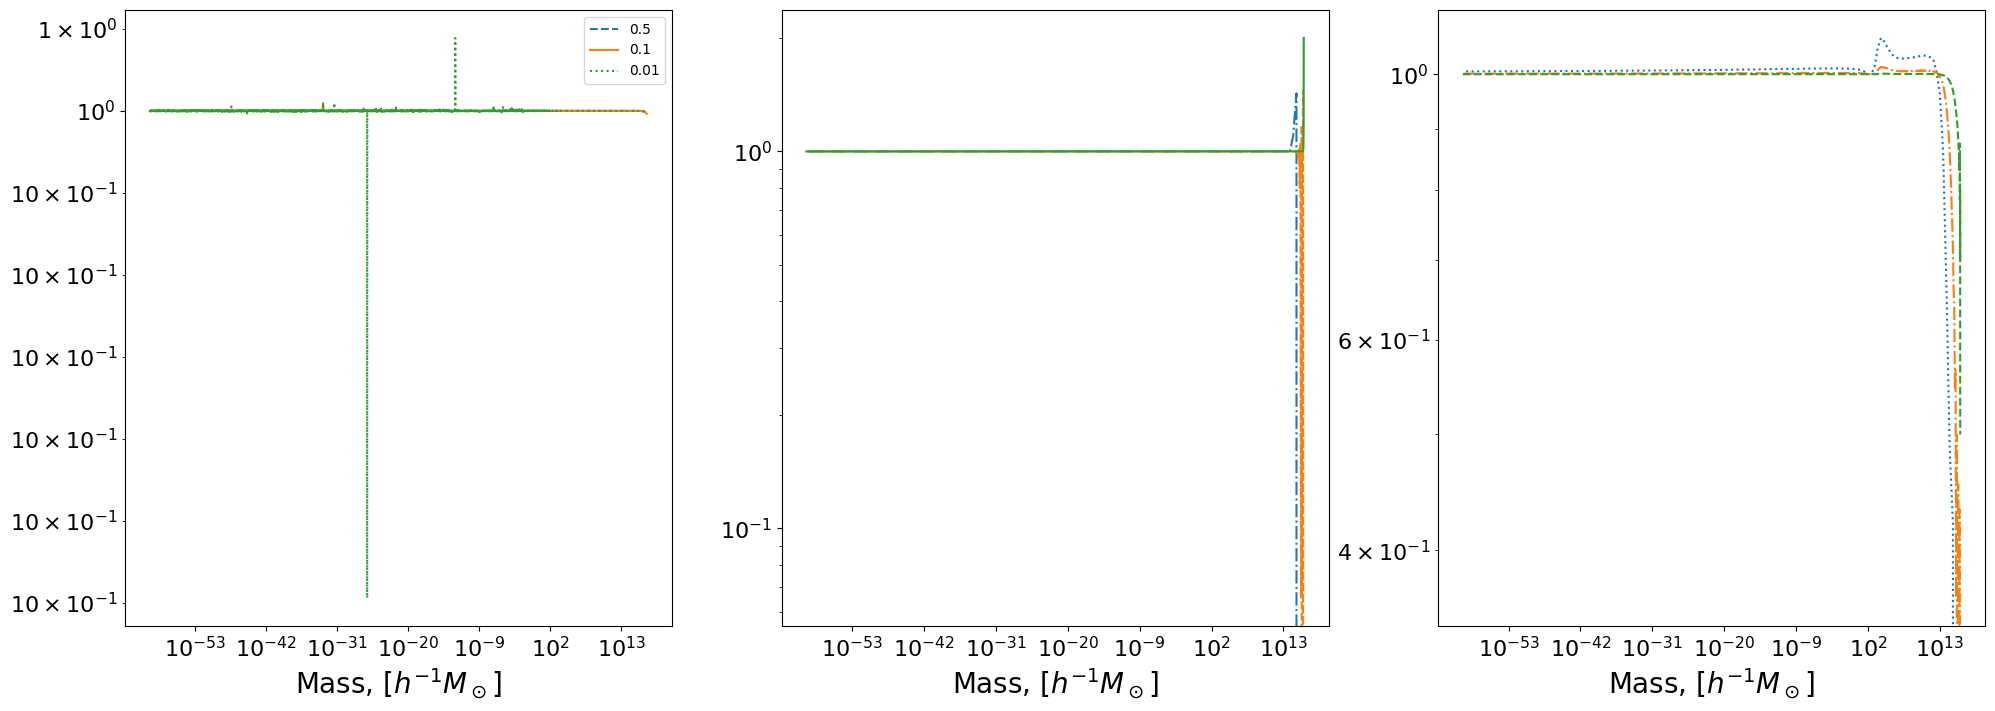

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8), sharex='col')
mfCAMB_T08=MassFunction(Mmin=-60,Mmax=17,z=0,dlog10m=0.001, hmf_model="Tinker08", mdef_model  = "SOCritical", mdef_params = {"overdensity": 500}, lnk_min=-30, lnk_max=100, dlnk=0.1, transfer_model='CAMB', transfer_params={"kmax": 500, "extrapolate_with_eh": True})
xiCAMBm_T08, miCAMBm_T08, fmCAMBm_T08=cal_integ_logmass(mfCAMB_T08,minm=-60,maxm=17)
dndm=np.float64(mfCAMB_T08.dndm)
dm=np.float64(mfCAMB_T08.m)
for i in [0.5, 0.1, 0.01]:
    print(i)
    mfCAMB_T08.dlog10m=i
    xiCAMB2_T08, miCAMB2_T08, fmCAMB2_T08=cal_integ_logmass(mfCAMB_T08,minm=-60,maxm=17)
    tmpm=np.interp(np.float64(mfCAMB_T08.m),dm,dndm)
    axs[0].loglog(mfCAMB_T08.m, mfCAMB_T08.dndm/tmpm, ls=next(linecycler), label=str(i))
    tmpm=np.interp(np.float64(xiCAMB2_T08),np.float64(xiCAMBm_T08),np.float64(miCAMBm_T08))
    axs[1].loglog(xiCAMB2_T08, miCAMB2_T08/tmpm, ls=next(linecycler), label=str(i))
    tmpm=np.interp(np.float64(xiCAMB2_T08),np.float64(xiCAMBm_T08),np.float64(fmCAMBm_T08))
    axs[2].loglog(xiCAMB2_T08, fmCAMB2_T08/tmpm, ls=next(linecycler), label=str(i))


axs[0].legend()
[ass.set_xlabel(r"Mass, $[h^{-1}M_\odot]$") for ass in axs]    

# The effects of Maxk

In [175]:
mf_so=MassFunction(Mmin=-50,Mmax=17,z=0,hmf_model="Tinker08", mdef_model  = "SOCritical", mdef_params = {"overdensity": 500}, lnk_min=-20, lnk_max=20, transfer_model='BBKS')
# ,  transfer_params={"kmax": 10000, "extrapolate_with_eh": True})

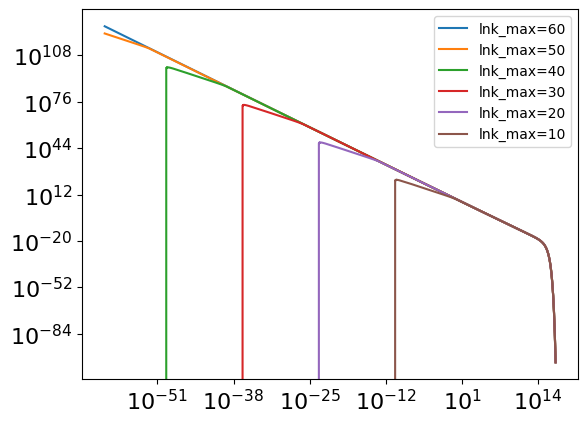

In [190]:
mf_so.Mmin=-60;
for i in [60,50,40,30,20,10]:
    mf_so.lnk_max=i
    plt.loglog(mf_so.m[::-1],mf_so.dndm[::-1], ls='-', label='lnk_max=%d'%i)
plt.legend()

# Check update function

In [25]:
TrFu=['CAMB','EH_BAO','EH_NoBAO','BBKS', 'BondEfs', 'EH']
mf_up=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="PS", lnk_min=-30, lnk_max=100,
                    transfer_model='CAMB',  transfer_params={"kmax": 500, "extrapolate_with_eh": True},cosmo_model=cosmology.cosmo.Planck15)
mf_up.update(transfer_model='BBKS', transfer_params={})
mf_dr=MassFunction(Mmin=-60,Mmax=17,dlog10m=0.01,z=0,hmf_model="PS", lnk_min=-30, lnk_max=100, transfer_model='BBKS',cosmo_model=cosmology.cosmo.Planck15)


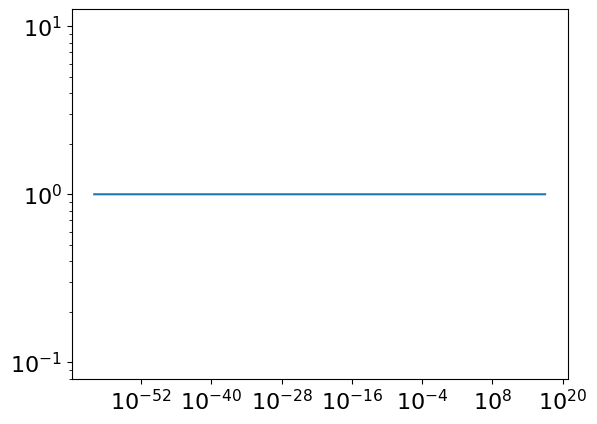

In [26]:
plt.loglog(mf_up.m,mf_up.dndm/mf_dr.dndm)

In [214]:
from astropy.cosmology import Planck15

In [226]:
a, b, c, ms = np.float64([6.71, -0.091, 0.44, 2e12])